In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
import matplotlib.pyplot as plt
import numpy as np

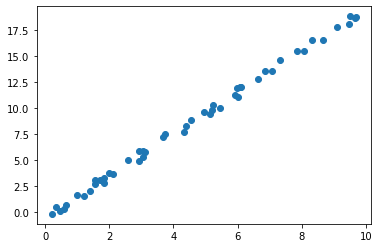

In [4]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
plt.scatter(x,y);

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression(fit_intercept=True)

In [7]:
X = x.reshape(50,1)
X.shape

(50, 1)

In [8]:
model.fit(X,y)

print(model.coef_)
print(model.intercept_)

[2.00660766]
-0.5350275750800026


In [9]:
model.score(X, y) # 정확도

0.997216672827933

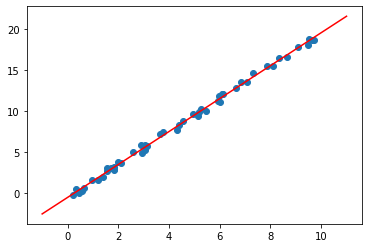

In [10]:
## 모델 시각화
xfit = np.linspace(-1,11)
plt.scatter(x,y)
plt.plot(xfit, model.coef_ * xfit + model.intercept_, '-r');

In [11]:
#파이프라인
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [12]:
#데이터 생성
import numpy as np

def make_data(N, err=1.0, rseed=1):
  rng = np.random.RandomState(rseed)
  X = rng.rand(N) **2
  y = 10-1./(X+0.1)
  if err > 0:
    y += err * rng.rand(N)
    return X, y

  X,y = make_data(40)

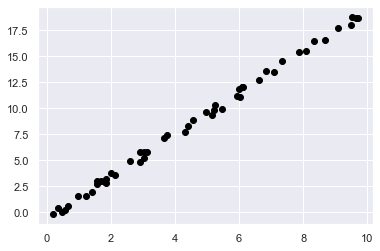

In [13]:
# 데이터 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()

X_test = np.linspace(-0.1,1.1,500)
plt.scatter(X,y,color='black')
axix=plt.axis()

ValueError: Found array with dim 3. Estimator expected <= 2.

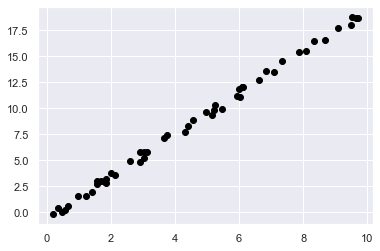

In [14]:
#데이터적합 결과 시각화

plt.scatter(X, y, color='black')

for degree in [1,2,3]:
    model = PolynomialRegression(degree)
    model.fit(X[:,np.newaxis], y)
    y_test = model.predict(X_test[:, np.newaxis])
    plt.plot(X_test, y_test, label=f'Degree={degree}')

plt.axis([-0.1, 1.0, -2, 12])
plt.legend(loc='best');

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[1 2 3 4 5 6 7 8 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer =

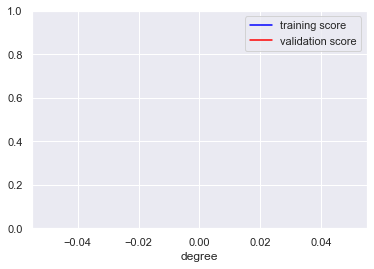

In [18]:
#데이터 검증 곡선
from sklearn.model_selection import validation_curve
degree = np.arange(1,10)

train_score, val_score = validation_curve(PolynomialRegression(),
     X[:, np.newaxis], y, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1),color = 'blue', label='training score')
plt.plot(degree, np.median(val_score,1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree');